# ParallelBNs: Experimentos circular fusion

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_info_rows = 30000000

sns.set_theme(style='darkgrid')

# Tamaño figuras
plt.rcParams["figure.figsize"] = (25,10)

In [2]:
df = pd.read_csv('results-circular-galgo-13-10+parcial-14-10.csv')
df['threads'] = pd.Categorical(df.threads)
df.drop(['seed','LL Score'], axis=1, inplace=True)
df

,algorithm,network,bbdd,threads,interleaving,SHD,BDeu Score,dfMM,dfMM plus,dfMM minus,Total iterations,Total time(s)
0,circular_ges,alarm,alarm.xbif50001246_,16,30,19,-57359.080276,44.0,10.0,34.0,16,19.853
1,circular_ges,alarm,alarm.xbif50001246_,2,10,16,-57398.228157,38.0,8.0,30.0,5,8.235
2,circular_ges,alarm,alarm.xbif50001246_,2,15,14,-57028.807106,32.0,4.0,28.0,5,8.104
3,circular_ges,alarm,alarm.xbif50001246_,2,20,16,-57390.295975,38.0,8.0,30.0,4,8.492
4,circular_ges,alarm,alarm.xbif50001246_,2,30,16,-57436.688789,38.0,8.0,30.0,4,9.918
...,...,...,...,...,...,...,...,...,...,...,...,...
5822,circular_ges,win95pts,win95pts.xbif_,6,5,122,-49901.865548,270.0,94.0,176.0,11,85.314
5823,circular_ges,win95pts,win95pts.xbif_,8,100,131,-50317.777690,280.0,80.0,200.0,9,97.176
5824,circular_ges,win95pts,win95pts.xbif_,8,10,122,-50006.736435,280.0,88.0,192.0,13,75.573
5825,circular_ges,win95pts,win95pts.xbif_,8,50,122,-50193.477648,266.0,90.0,176.0,10,83.903


## Fusión circular

Media de tiempo de ejecución

In [3]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 100)
df_unstack = df.drop(["algorithm", "bbdd", "interleaving", "SHD", "BDeu Score", "dfMM", "dfMM plus", "dfMM minus", "Total iterations"], axis=1)
df_unstack.groupby(["network", "threads"]).mean().unstack(0)

Total time(s)                                                         \
network         alarm        andes     barley    cancer     child earthquake   
threads                                                                        
0            7.546214  4173.053615  10.851929  0.271000  1.619571   0.280000   
2            8.180784  1733.625528  14.460784  0.423929  3.210480   0.482980   
4            7.915633   755.951606   7.816316  0.461908  3.741698   0.518115   
6           12.533590   936.099633  13.067895       NaN  5.720415        NaN   
8           10.418752   576.259574  10.002901       NaN  4.793926        NaN   
16          16.820457   632.783306  13.935571       NaN  6.539590        NaN   

                                                                  \
network hailfinder     hepar2  insurance          link    mildew   
threads                                                            
0        27.801769  24.102417   3.443333           NaN  2.912462   
2        24.648081  21.073471   5.532125  37356.817740  4.331292   
4        19.388406  14.353732   6.078344  14645.614667  4.148747   
6        32.430019  23.095755  10.125936  18219.322649  4.503748   
8        27.955244  18.102417   7.832108   9601.842875  3.266123   
16       44.825595  26.505548   9.658721  17876.827000  3.683386   

                                             
network          pigs     water    win95pts  
threads                                      
0                 NaN  2.632154  106.868846  
2        30836.448736  3.639896   89.502906  
4        13150.452395  3.592687   59.647021  
6        16442.306711  5.295676  102.396896  
8         8795.773676  4.466107   72.658600  
16       14567.527667  5.330870  104.398000

BDeu

In [4]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 100)
df_unstack = df.drop(["algorithm", "bbdd", "interleaving", "SHD", "Total time(s)", "dfMM", "dfMM plus", "dfMM minus", "Total iterations"], axis=1)
df_unstack.groupby(["network", "threads"]).mean().unstack(0)

BDeu Score                                              \
network         alarm          andes         barley        cancer   
threads                                                             
0       -56803.650187 -477938.423364 -318959.974278 -10587.806417   
2       -57104.736391 -475781.843025 -319283.567257 -10598.507915   
4       -56939.055101 -475503.999129 -320049.349015 -10598.219538   
6       -56964.724874 -475572.800292 -322658.742275           NaN   
8       -57119.583931 -475587.977963 -323721.919011           NaN   
16      -57627.757304 -476296.481958 -326610.005018           NaN   

                                                                  \
network         child   earthquake     hailfinder         hepar2   
threads                                                            
0       -63368.066833 -2363.124523 -259337.725514 -165764.957075   
2       -63162.339399 -2388.623246 -259582.239506 -165835.697343   
4       -63524.063162 -2389.226098 -259555.218078 -165834.278537   
6       -63426.606404          NaN -259541.546876 -165856.812479   
8       -63315.070636          NaN -259431.127293 -165879.926985   
16      -63260.120413          NaN -259537.863148 -165849.119014   

                                                                  \
network     insurance          link         mildew          pigs   
threads                                                            
0       -71492.448442           NaN -273824.977295           NaN   
2       -71326.327446 -1.323824e+06 -273821.563657 -1.715028e+06   
4       -71264.258305 -1.328939e+06 -273827.814337 -1.714633e+06   
6       -71739.421575 -1.328506e+06 -274503.641382 -1.714609e+06   
8       -71392.686751 -1.332168e+06 -273825.827092 -1.714333e+06   
16      -71441.113460 -1.359379e+06 -274138.172101 -1.712853e+06   

                                     
network         water      win95pts  
threads                              
0       -67117.555923 -49854.318114  
2       -67148.626387 -49902.770758  
4       -67137.238113 -50095.307106  
6       -67180.549858 -50108.830575  
8       -67152.591835 -50230.901767  
16      -67177.816638 -50415.309030

Número de ejecuciones

In [5]:
df_unstack.groupby(["network", "threads"]).count().unstack(0)

BDeu Score                                                         \
network      alarm andes barley cancer child earthquake hailfinder hepar2   
threads                                                                     
0               14    13     14     14    14         13         13     12   
2               97   106     97     98    98         98         99    102   
4               98    99     98     98    96         96         96     97   
6              105   109    105      0   106          0        107    110   
8              121   115    121      0   121          0        119    120   
16              35    36     35      0    39          0         42     42   

                                                   
network insurance link mildew pigs water win95pts  
threads                                            
0              12    0     13    0    13       13  
2             104   50    106   72   106      106  
4              96   75     99   81    99       96  
6             110   74    111   97   111      106  
8             120   80    122   74   121      115  
16             43    2     44    3    46       39

### Tiempo de ejecución ``andes``:

In [41]:
df = pd.read_csv('results-circular-galgo-13-10+parcial-14-10.csv')
df['threads'] = pd.Categorical(df.threads)
df.drop(['seed','LL Score'], axis=1, inplace=True)
df

df2 = df[df["network"] == "andes"]
df2

,algorithm,network,bbdd,threads,interleaving,SHD,BDeu Score,dfMM,dfMM plus,dfMM minus,Total iterations,Total time(s)
308,ges,andes,andes.xbif50001246_,0,0,189,-475936.383483,428.0,78.0,350.0,1,2298.463
309,circular_ges,andes,andes.xbif50001246_,2,10,170,-475121.373406,372.0,32.0,340.0,19,1607.139
310,circular_ges,andes,andes.xbif50001246_,2,15,191,-475697.229670,432.0,78.0,354.0,14,1513.056
311,circular_ges,andes,andes.xbif50001246_,2,20,190,-475712.367312,422.0,70.0,352.0,11,1634.365
312,circular_ges,andes,andes.xbif50001246_,2,30,178,-475449.159406,402.0,60.0,342.0,11,1482.279
...,...,...,...,...,...,...,...,...,...,...,...,...
4138,circular_ges,andes,andes.xbif_,6,5,160,-475314.831719,346.0,10.0,336.0,19,962.131
4139,circular_ges,andes,andes.xbif_,8,100,203,-476690.444265,452.0,76.0,376.0,10,650.199
4140,circular_ges,andes,andes.xbif_,8,10,189,-475881.440606,414.0,46.0,368.0,12,420.389
4141,circular_ges,andes,andes.xbif_,8,50,201,-476485.727805,452.0,100.0,352.0,10,526.026


Text(0.5, 1.0, 'BDeu en andes')

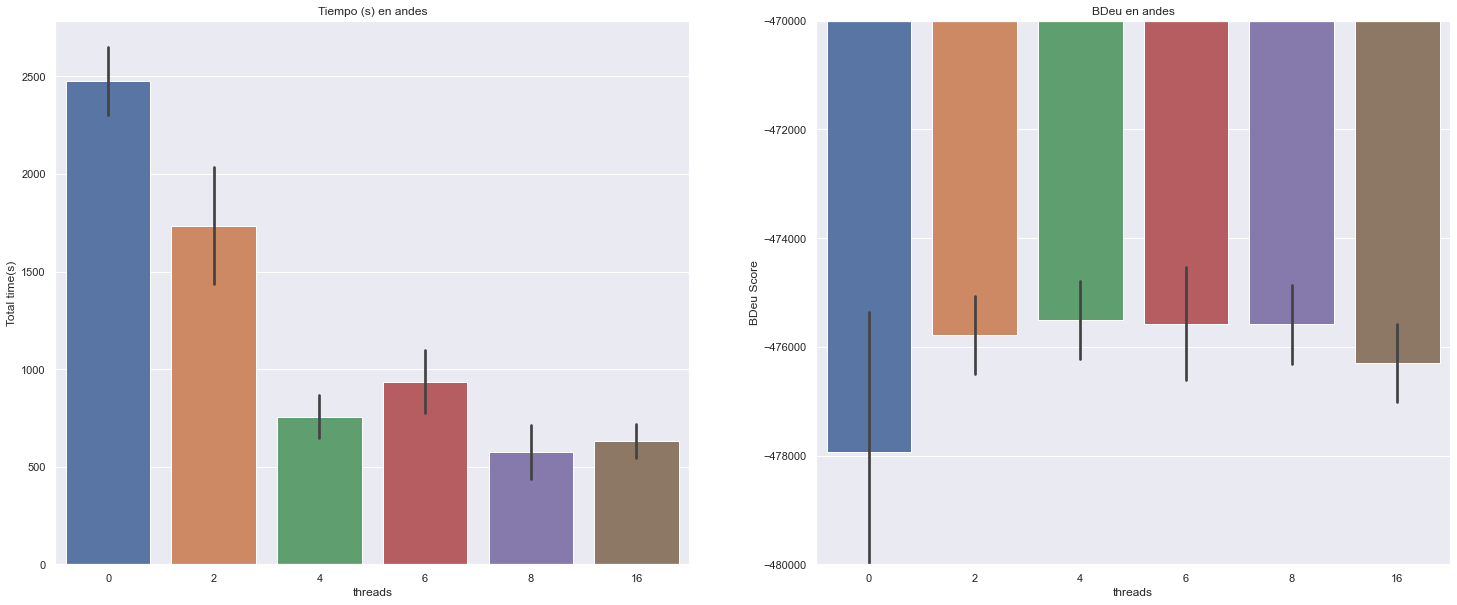

In [42]:
fig, axs = plt.subplots(ncols=2)
sns.barplot(data=df2, x="threads", y='Total time(s)', ax=axs[0], ci='sd')
plt.ylim(-480000,-470000)
sns.barplot(data=df2, x="threads", y='BDeu Score', ax=axs[1], ci='sd')
axs[0].set_title('Tiempo (s) en andes')
axs[1].set_title('BDeu en andes')

<AxesSubplot:xlabel='threads', ylabel='Total time(s)'>

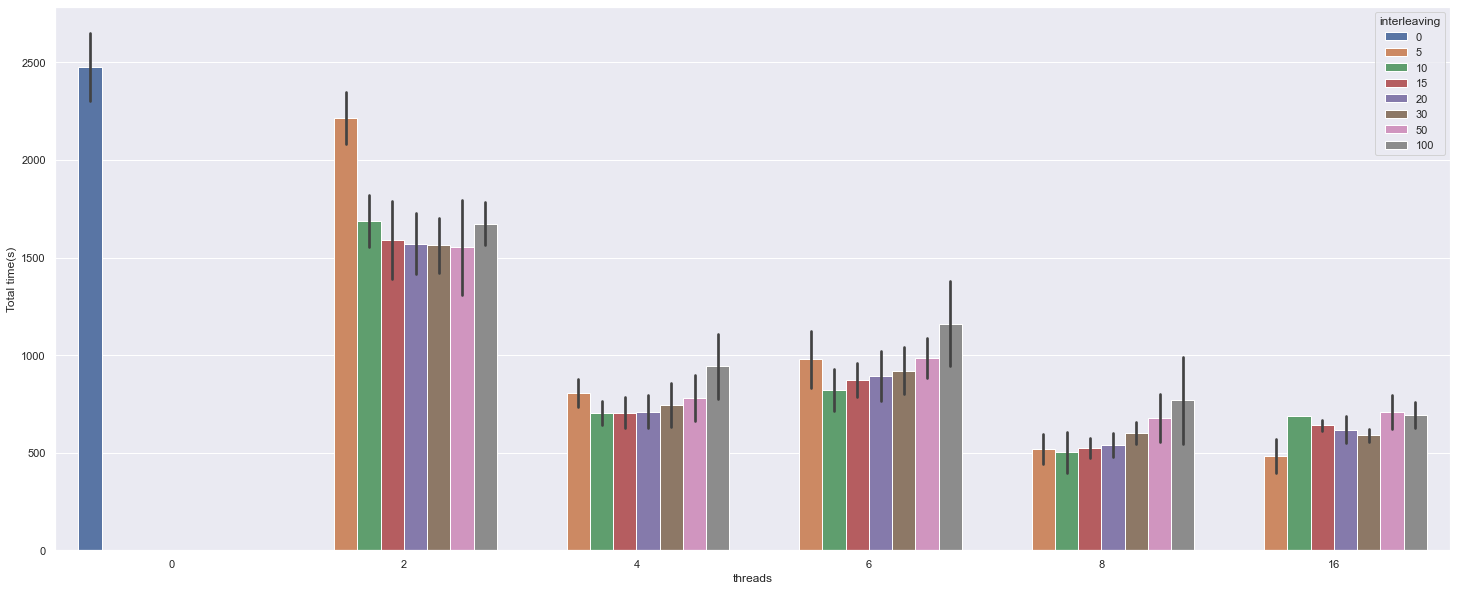

In [44]:
sns.barplot(data=df2, x="threads", y='Total time(s)', hue='interleaving', ci='sd')

<AxesSubplot:xlabel='threads', ylabel='BDeu Score'>

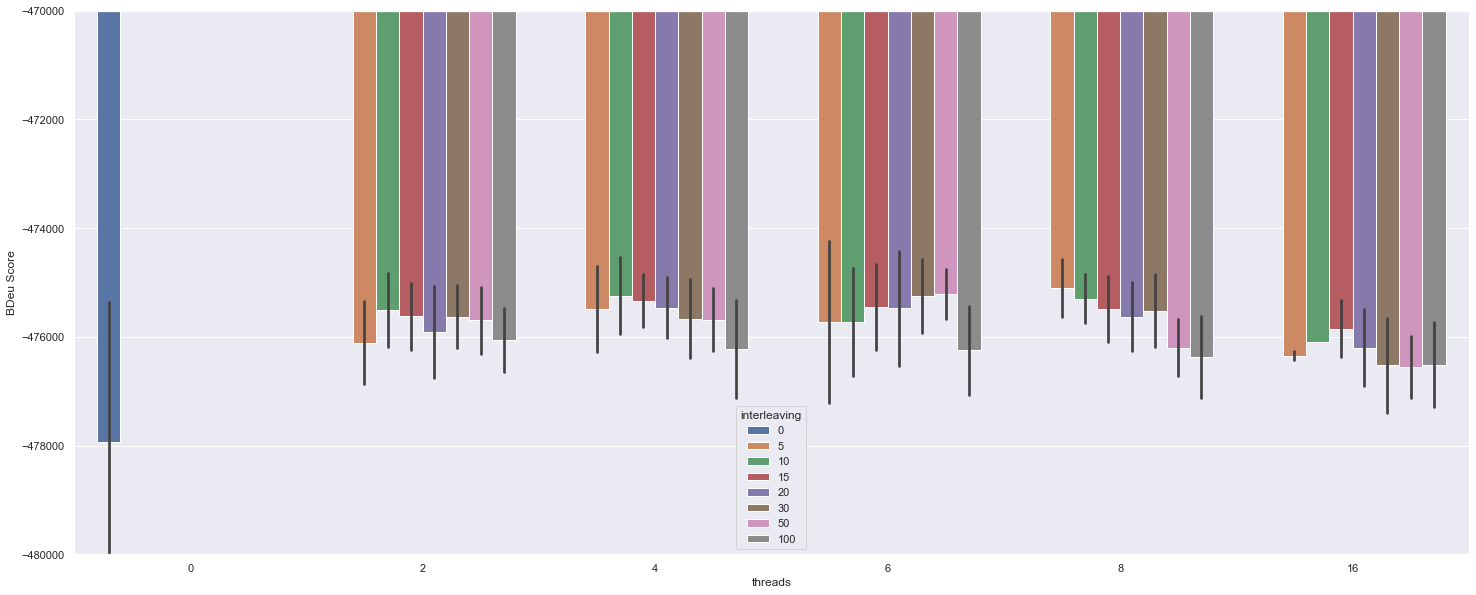

In [46]:
plt.ylim(-480000,-470000)
sns.barplot(data=df2, x="threads", y='BDeu Score', hue='interleaving', ci='sd')

Text(0.5, 1.0, 'Tiempo en andes por número de hilos (0 = GES)')

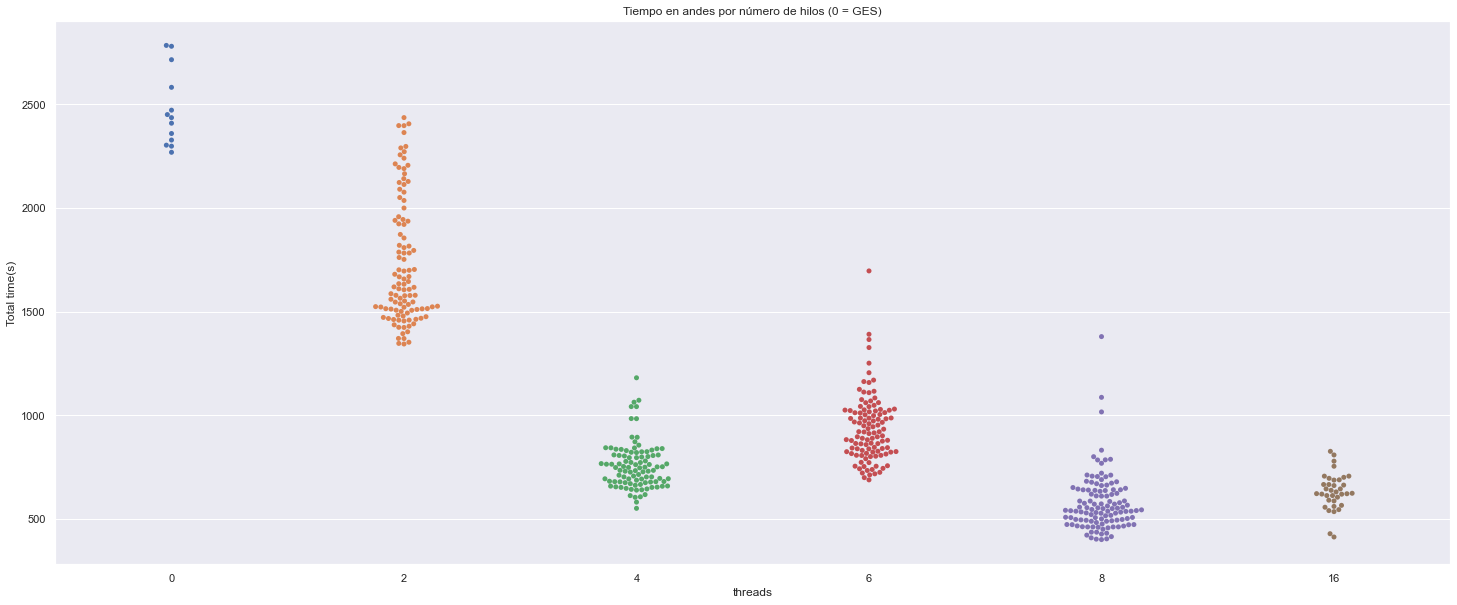

In [47]:
sns.swarmplot(data=df2, x='threads', y='Total time(s)').set_title('Tiempo en andes por número de hilos (0 = GES)')

#### BDeu:

Text(0.5, 1.0, 'BDeu en andes por número de hilos (0 = GES)')

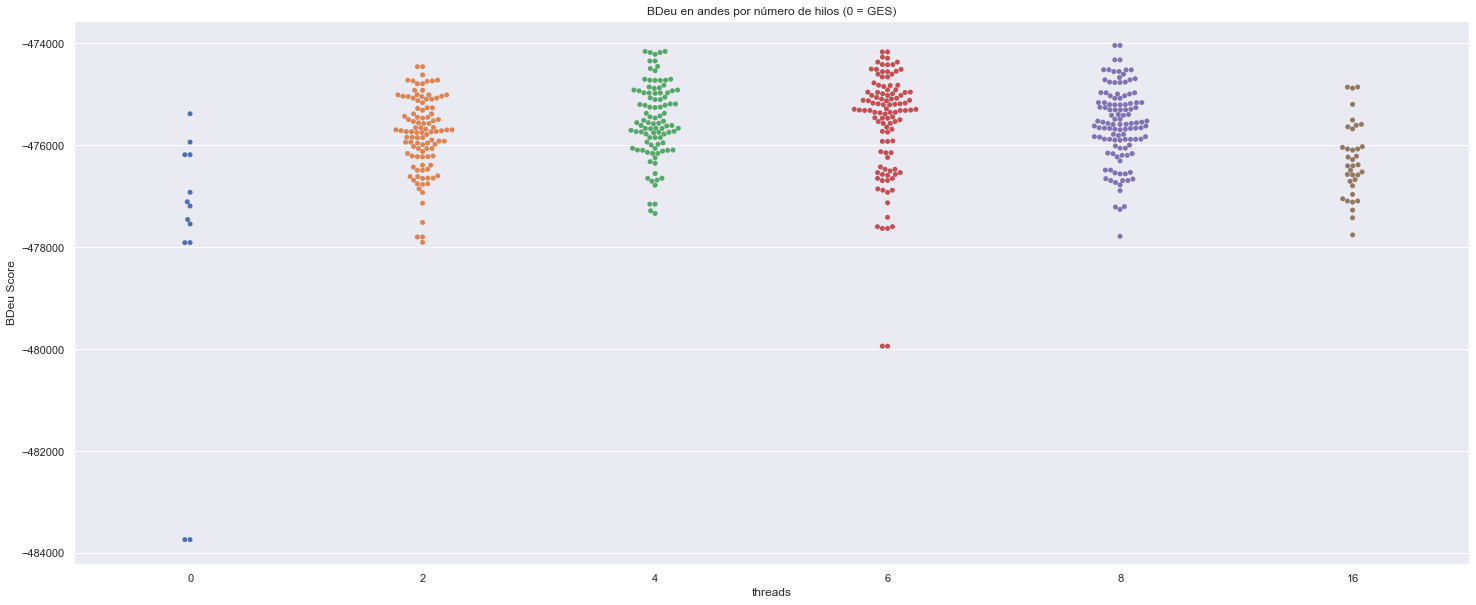

In [48]:
sns.swarmplot(data=df2, x='threads', y='BDeu Score').set_title('BDeu en andes por número de hilos (0 = GES)')

### Tiempo de ejecución ``pigs``:

In [49]:
df2 = df[df["network"] == "pigs"]
df2

,algorithm,network,bbdd,threads,interleaving,SHD,BDeu Score,dfMM,dfMM plus,dfMM minus,Total iterations,Total time(s)
2969,circular_ges,pigs,pigs.xbif50001246_,2,10,20,-1.716191e+06,46.0,38.0,8.0,36,26832.753
2970,circular_ges,pigs,pigs.xbif50001246_,2,15,26,-1.719227e+06,58.0,32.0,26.0,24,27073.549
2971,circular_ges,pigs,pigs.xbif50001246_,2,30,11,-1.713181e+06,26.0,24.0,2.0,20,24664.754
2972,circular_ges,pigs,pigs.xbif50001246_,2,50,15,-1.714828e+06,36.0,32.0,4.0,12,25319.281
2973,circular_ges,pigs,pigs.xbif50001246_,4,10,12,-1.713775e+06,32.0,30.0,2.0,29,10723.885
...,...,...,...,...,...,...,...,...,...,...,...,...
5464,circular_ges,pigs,pigs.xbif_,6,10,14,-1.713317e+06,38.0,30.0,8.0,24,13715.102
5465,circular_ges,pigs,pigs.xbif_,6,50,17,-1.714261e+06,50.0,42.0,8.0,17,14903.772
5466,circular_ges,pigs,pigs.xbif_,6,5,4,-1.711266e+06,10.0,6.0,4.0,37,19947.177
5467,circular_ges,pigs,pigs.xbif_,8,10,7,-1.711790e+06,18.0,14.0,4.0,29,7273.583


Text(0.5, 1.0, 'BDeu en pigs')

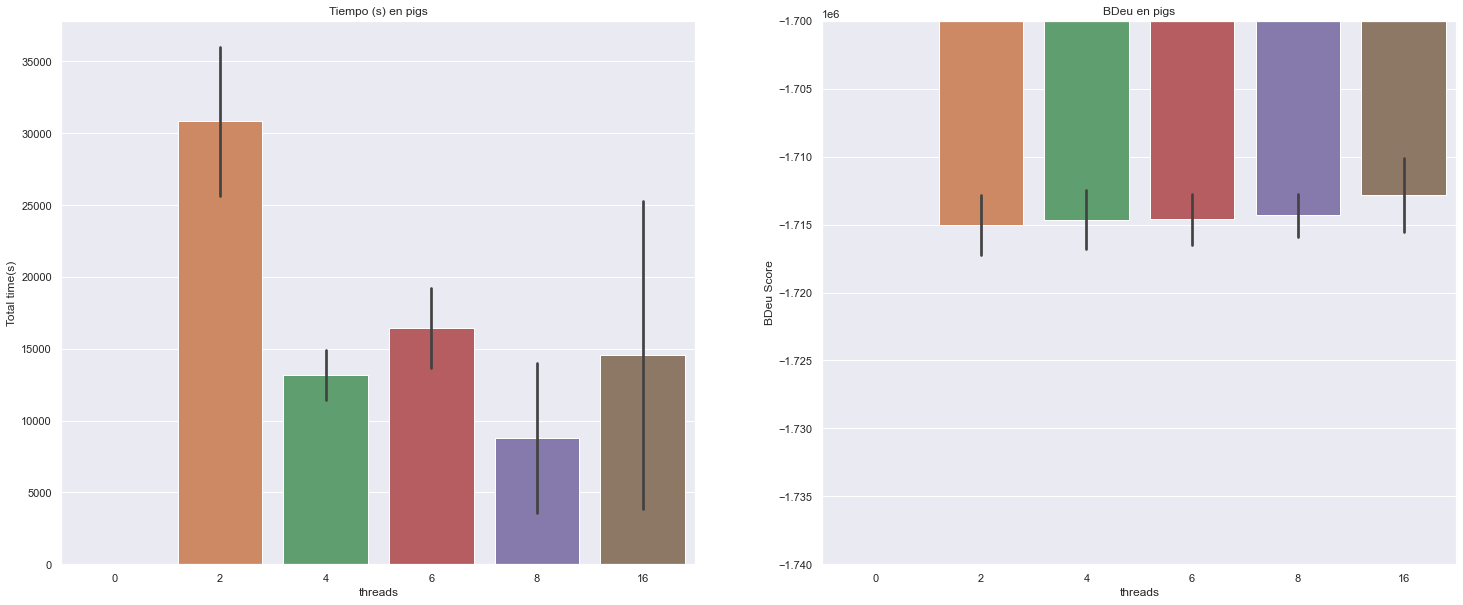

In [50]:
fig, axs = plt.subplots(ncols=2)
sns.barplot(data=df2, x="threads", y='Total time(s)', ax=axs[0], ci='sd')
plt.ylim(-1740000,-1700000)
sns.barplot(data=df2, x="threads", y='BDeu Score', ax=axs[1], ci='sd')
axs[0].set_title('Tiempo (s) en pigs')
axs[1].set_title('BDeu en pigs')

<AxesSubplot:xlabel='threads', ylabel='Total time(s)'>

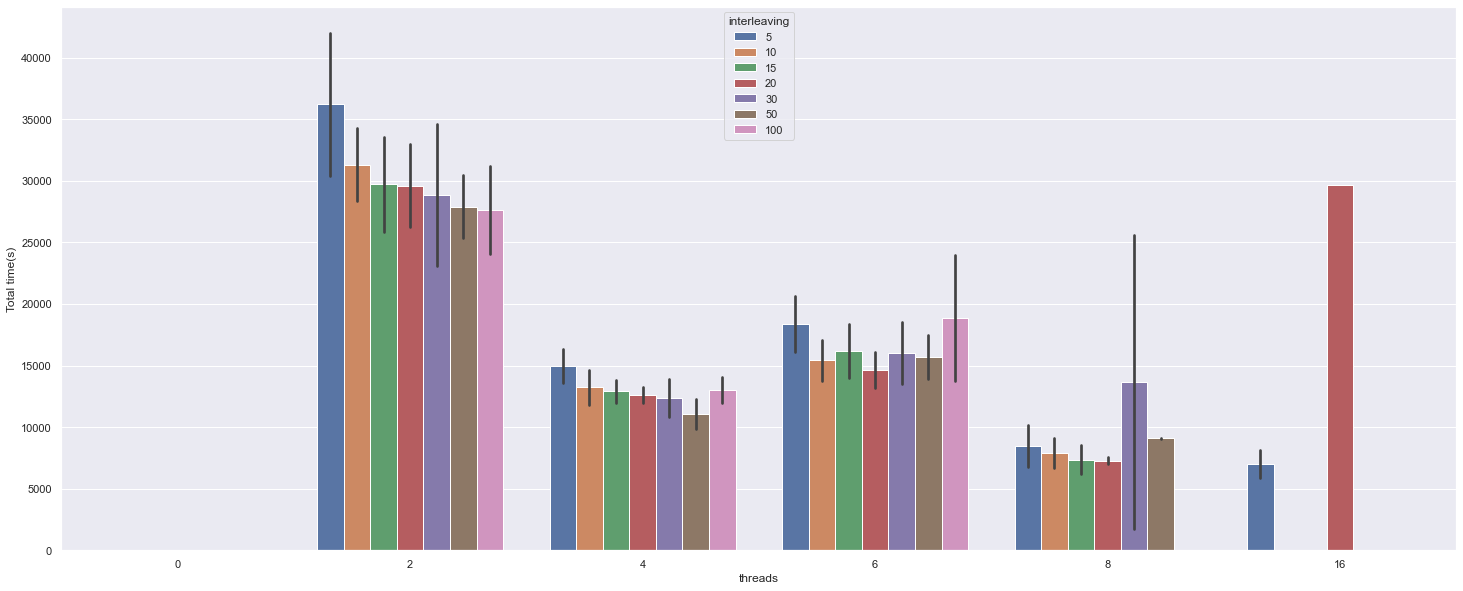

In [51]:
sns.barplot(data=df2, x="threads", y='Total time(s)', hue='interleaving', ci='sd')

<AxesSubplot:xlabel='threads', ylabel='BDeu Score'>

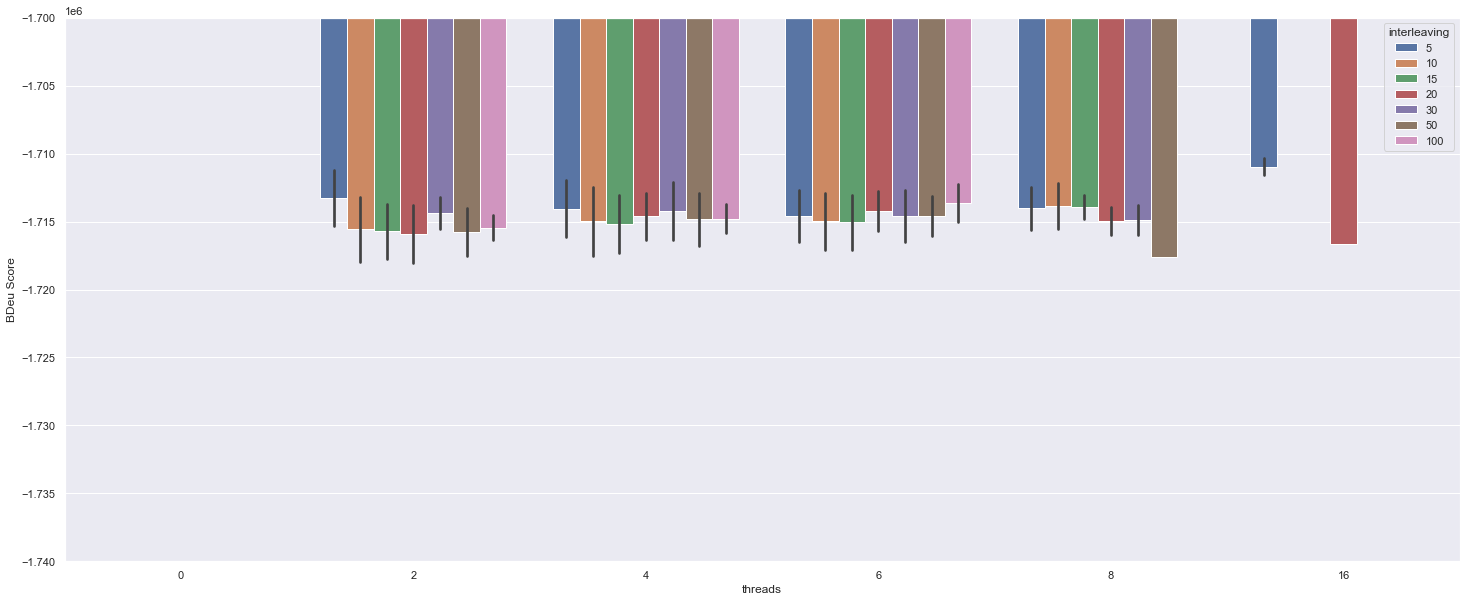

In [52]:
plt.ylim(-1740000,-1700000)
sns.barplot(data=df2, x="threads", y='BDeu Score', hue='interleaving', ci='sd')

Text(0.5, 1.0, 'Tiempo en pigs por número de hilos (0 = GES)')

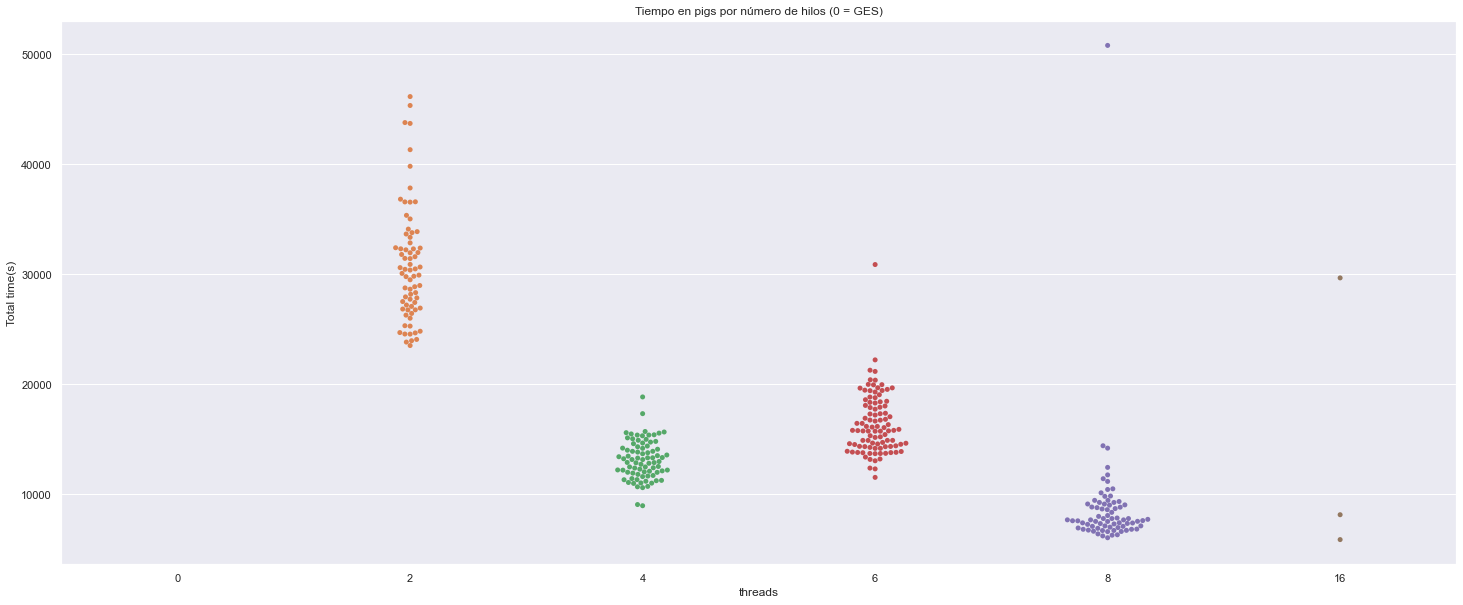

In [53]:
sns.swarmplot(data=df2, x='threads', y='Total time(s)').set_title('Tiempo en pigs por número de hilos (0 = GES)')

Text(0.5, 1.0, 'BDeu en pigs por número de hilos (0 = GES)')

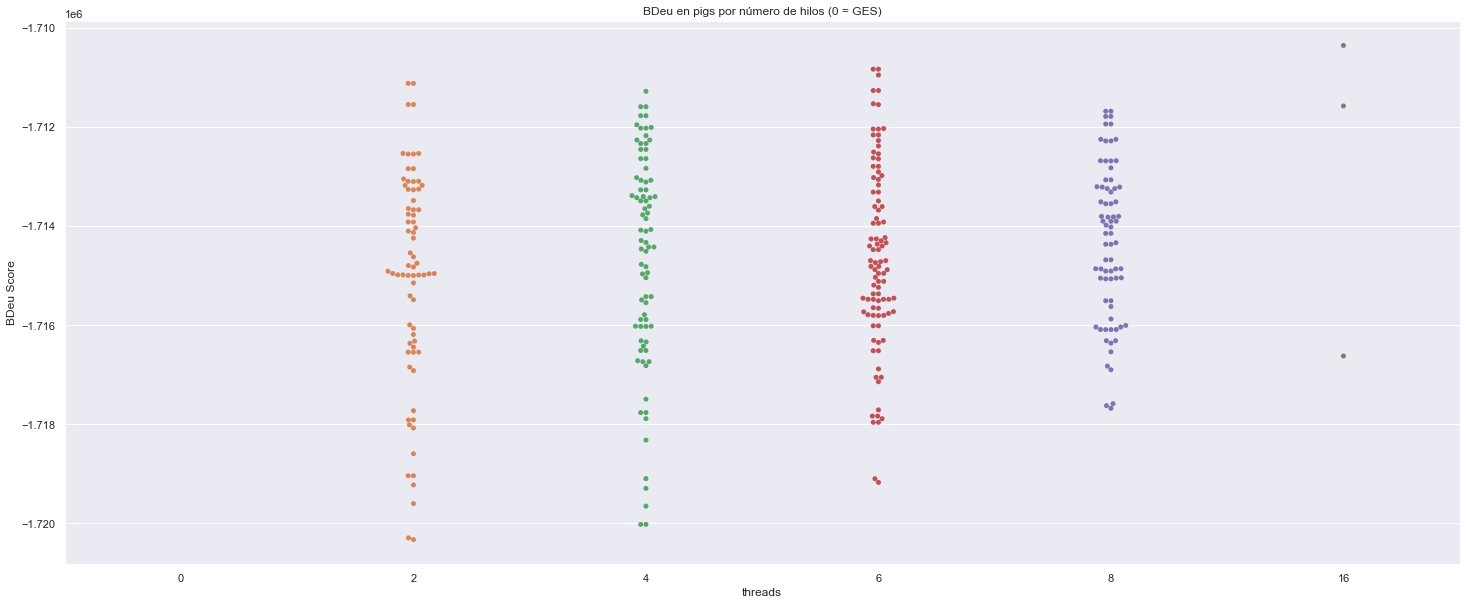

In [54]:
sns.swarmplot(data=df2, x='threads', y='BDeu Score').set_title('BDeu en pigs por número de hilos (0 = GES)')

### Tiempo de ejecución ``link``:

In [55]:
df2 = df[df["network"] == "link"]
df2

,algorithm,network,bbdd,threads,interleaving,SHD,BDeu Score,dfMM,dfMM plus,dfMM minus,Total iterations,Total time(s)
2460,circular_ges,link,link.xbif50001246_,2,10,972,-1.298870e+06,1984.0,544.0,1440.0,52,35010.797
2461,circular_ges,link,link.xbif50001246_,2,15,983,-1.307774e+06,2002.0,560.0,1442.0,36,33988.758
2462,circular_ges,link,link.xbif50001246_,2,30,1006,-1.321093e+06,2070.0,626.0,1444.0,20,33795.751
2463,circular_ges,link,link.xbif50001246_,2,50,1084,-1.347433e+06,2254.0,712.0,1542.0,14,30191.535
2464,circular_ges,link,link.xbif50001246_,4,10,998,-1.329460e+06,2062.0,644.0,1418.0,38,15617.268
...,...,...,...,...,...,...,...,...,...,...,...,...
5181,circular_ges,link,link.xbif_,2,5,972,-1.288752e+06,2020.0,590.0,1430.0,102,43519.570
5182,circular_ges,link,link.xbif_,4,10,961,-1.287920e+06,1984.0,558.0,1426.0,33,14535.302
5183,circular_ges,link,link.xbif_,4,5,961,-1.296605e+06,1984.0,586.0,1398.0,58,14756.269
5184,circular_ges,link,link.xbif_,8,10,964,-1.295936e+06,2012.0,636.0,1376.0,27,7566.175


Text(0.5, 1.0, 'BDeu en link')

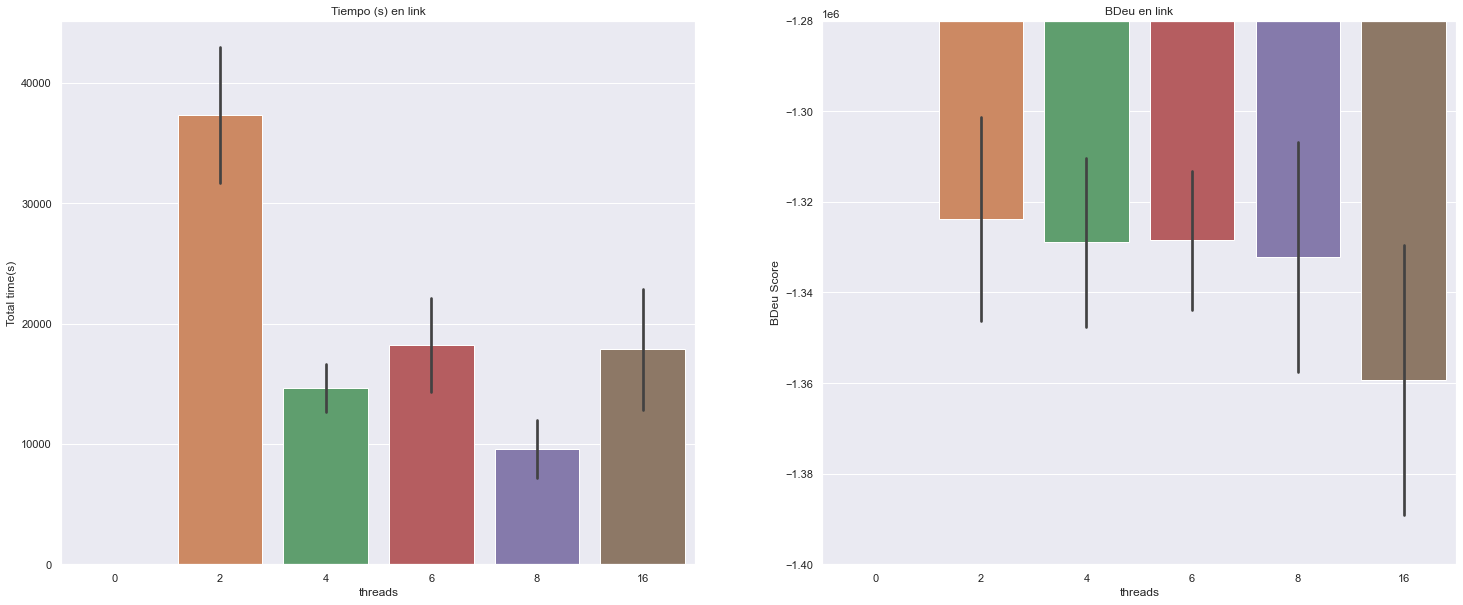

In [56]:
fig, axs = plt.subplots(ncols=2)
sns.barplot(data=df2, x="threads", y='Total time(s)', ax=axs[0], ci='sd')
plt.ylim(-1400000,-1280000)
sns.barplot(data=df2, x="threads", y='BDeu Score', ax=axs[1], ci='sd')
axs[0].set_title('Tiempo (s) en link')
axs[1].set_title('BDeu en link')

<AxesSubplot:xlabel='threads', ylabel='Total time(s)'>

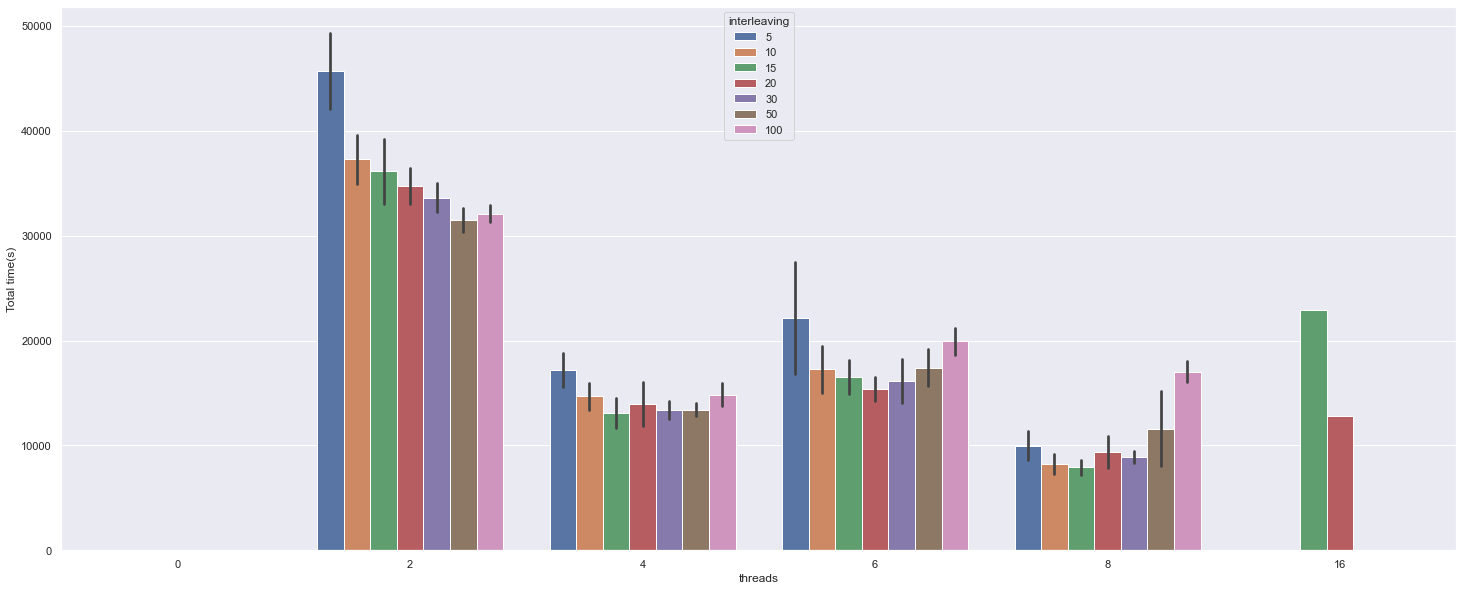

In [57]:
sns.barplot(data=df2, x="threads", y='Total time(s)', hue='interleaving', ci='sd')

<AxesSubplot:xlabel='threads', ylabel='BDeu Score'>

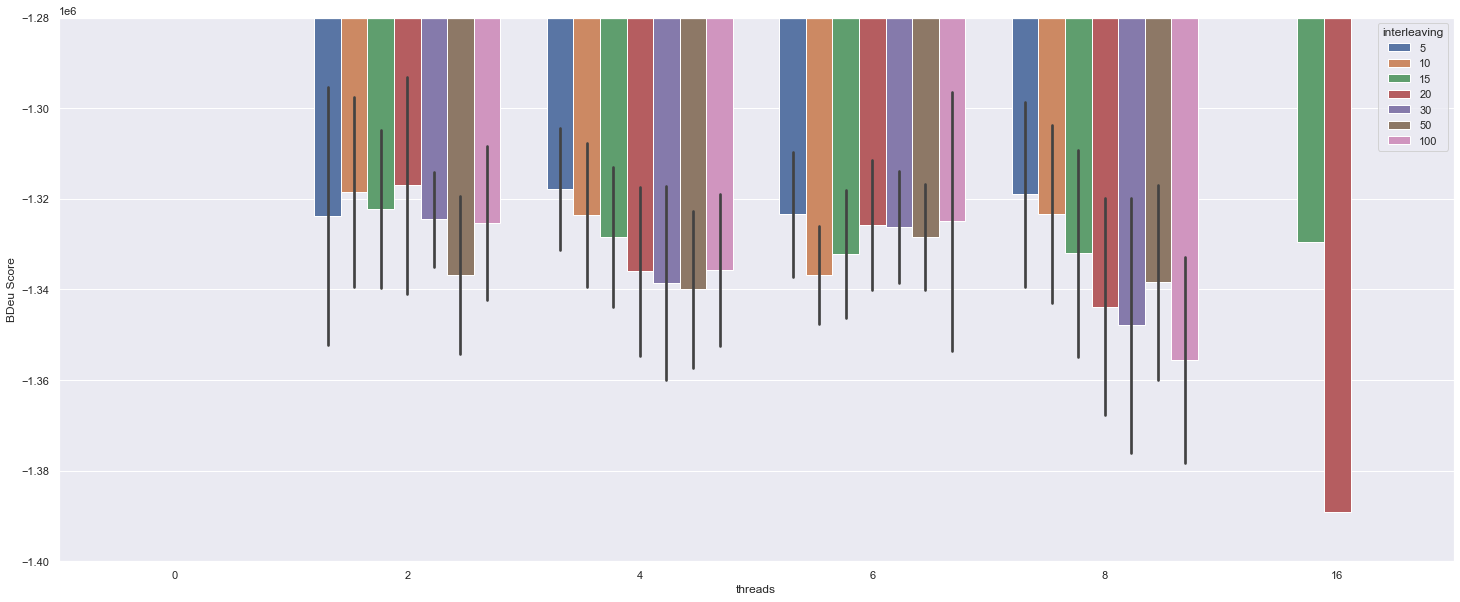

In [58]:
plt.ylim(-1400000,-1280000)
sns.barplot(data=df2, x="threads", y='BDeu Score', hue='interleaving', ci='sd')

Text(0.5, 1.0, 'Tiempo en link por número de hilos (0 = GES)')

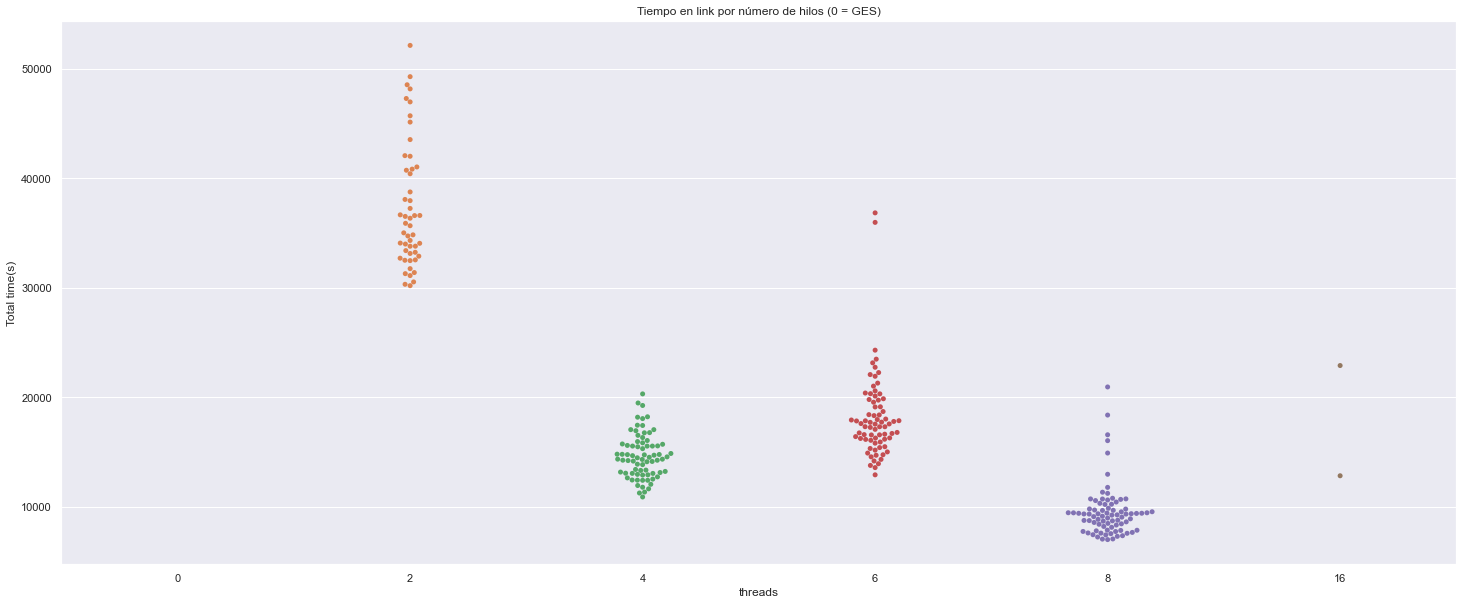

In [59]:
sns.swarmplot(data=df2, x='threads', y='Total time(s)').set_title('Tiempo en link por número de hilos (0 = GES)')

Text(0.5, 1.0, 'BDeu en link por número de hilos (0 = GES)')

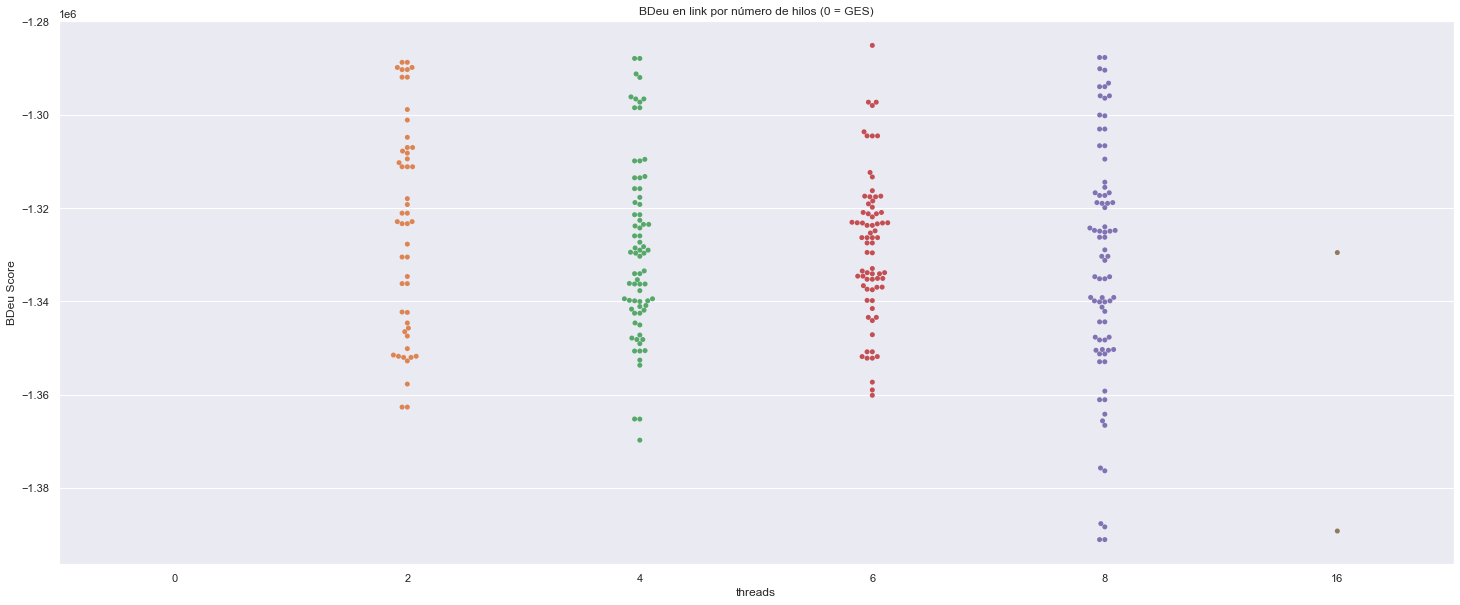

In [60]:
sns.swarmplot(data=df2, x='threads', y='BDeu Score').set_title('BDeu en link por número de hilos (0 = GES)')

### Tiempo de ejecución ``win95pts``:

In [61]:
df2 = df[df["network"] == "win95pts"]
df2

,algorithm,network,bbdd,threads,interleaving,SHD,BDeu Score,dfMM,dfMM plus,dfMM minus,Total iterations,Total time(s)
3509,ges,win95pts,win95pts.xbif50001246_,0,0,105,-50229.363522,238.0,74.0,164.0,1,92.156
3510,circular_ges,win95pts,win95pts.xbif50001246_,16,30,131,-50187.424898,290.0,94.0,196.0,15,123.184
3511,circular_ges,win95pts,win95pts.xbif50001246_,2,10,125,-49874.020312,276.0,92.0,184.0,10,91.249
3512,circular_ges,win95pts,win95pts.xbif50001246_,2,15,114,-49917.233502,258.0,80.0,178.0,9,88.628
3513,circular_ges,win95pts,win95pts.xbif50001246_,2,20,106,-49947.794280,238.0,68.0,170.0,6,88.673
...,...,...,...,...,...,...,...,...,...,...,...,...
5822,circular_ges,win95pts,win95pts.xbif_,6,5,122,-49901.865548,270.0,94.0,176.0,11,85.314
5823,circular_ges,win95pts,win95pts.xbif_,8,100,131,-50317.777690,280.0,80.0,200.0,9,97.176
5824,circular_ges,win95pts,win95pts.xbif_,8,10,122,-50006.736435,280.0,88.0,192.0,13,75.573
5825,circular_ges,win95pts,win95pts.xbif_,8,50,122,-50193.477648,266.0,90.0,176.0,10,83.903


Text(0.5, 1.0, 'BDeu en win95pts')

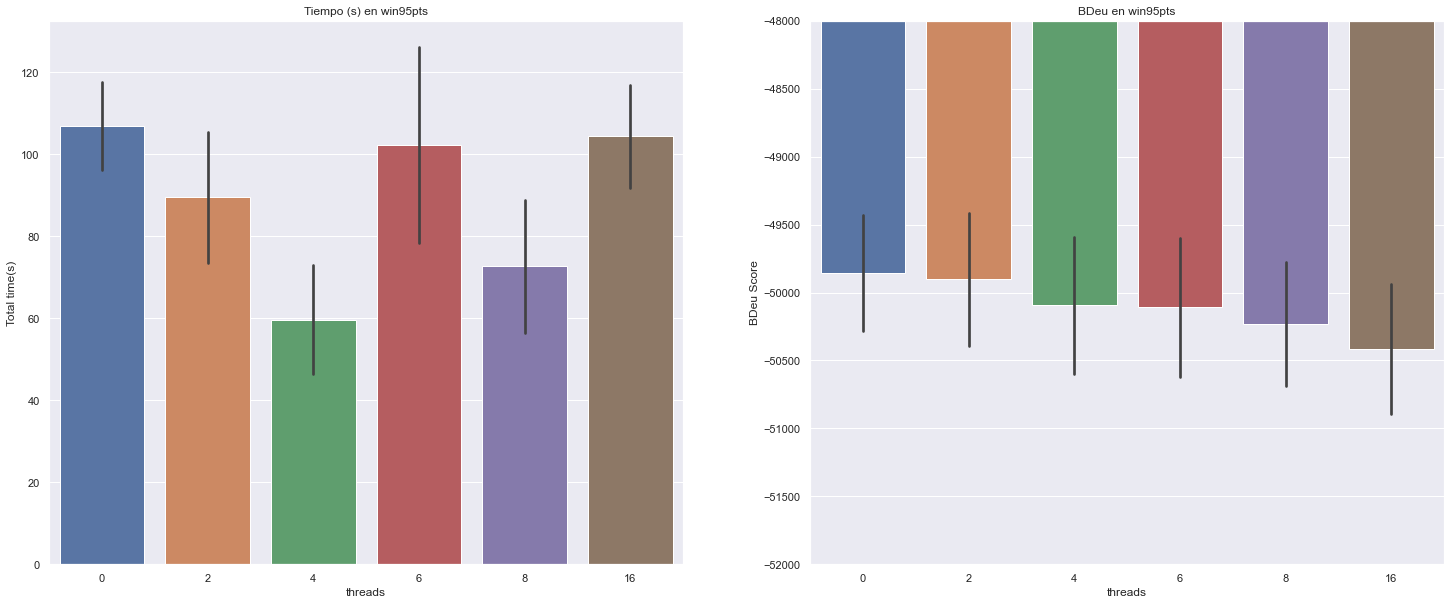

In [62]:
fig, axs = plt.subplots(ncols=2)
sns.barplot(data=df2, x="threads", y='Total time(s)', ax=axs[0], ci='sd')
plt.ylim(-52000,-48000)
sns.barplot(data=df2, x="threads", y='BDeu Score', ax=axs[1], ci='sd')
axs[0].set_title('Tiempo (s) en win95pts')
axs[1].set_title('BDeu en win95pts')

<AxesSubplot:xlabel='threads', ylabel='Total time(s)'>

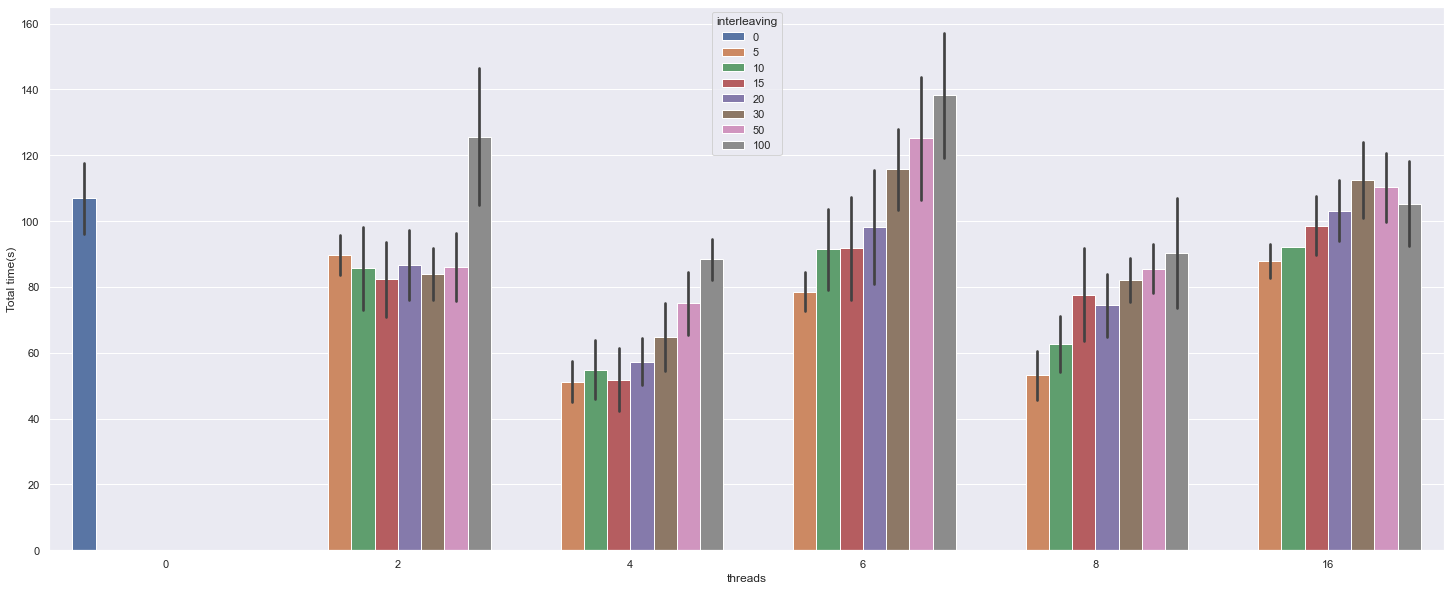

In [63]:
sns.barplot(data=df2, x="threads", y='Total time(s)', hue='interleaving', ci='sd')

<AxesSubplot:xlabel='threads', ylabel='BDeu Score'>

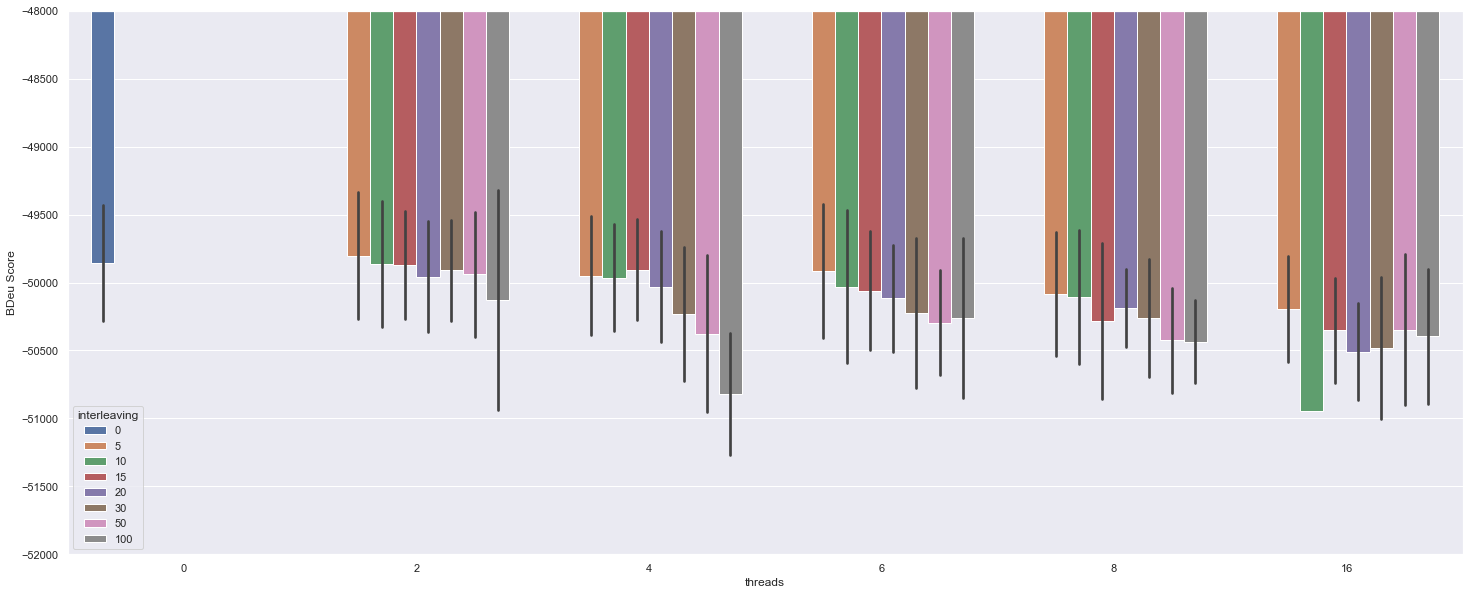

In [64]:
plt.ylim(-52000,-48000)
sns.barplot(data=df2, x="threads", y='BDeu Score', hue='interleaving', ci='sd')

Text(0.5, 1.0, 'Tiempo en win95pts por número de hilos (0 = GES)')

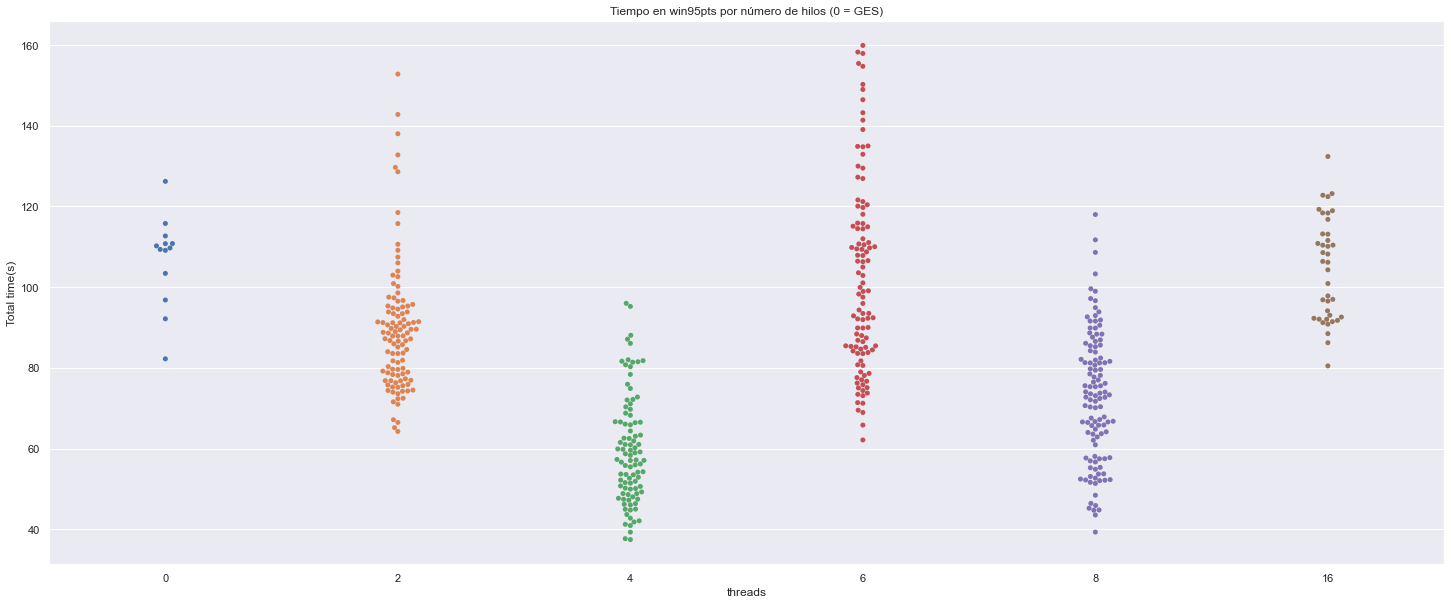

In [65]:
sns.swarmplot(data=df2, x='threads', y='Total time(s)').set_title('Tiempo en win95pts por número de hilos (0 = GES)')

Text(0.5, 1.0, 'BDeu en win95pts por número de hilos (0 = GES)')

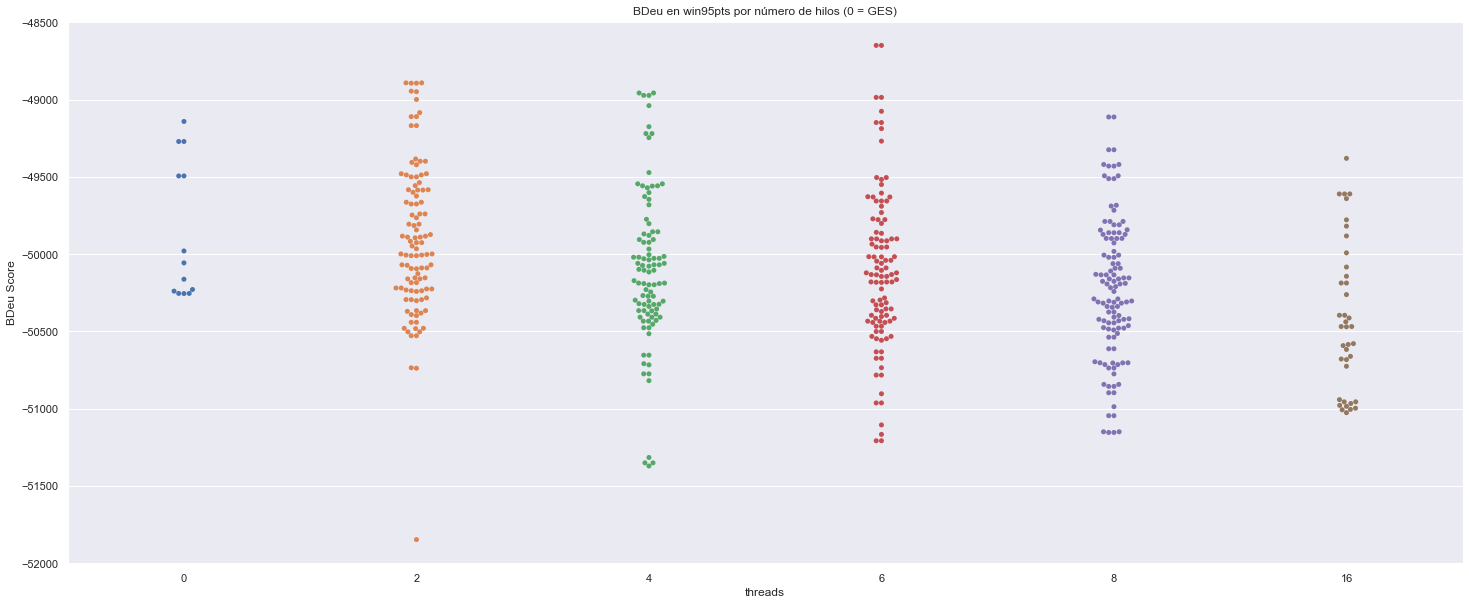

In [66]:
sns.swarmplot(data=df2, x='threads', y='BDeu Score').set_title('BDeu en win95pts por número de hilos (0 = GES)')

### Tiempo de ejecución ``alarm``:

In [67]:
df2 = df[df["network"] == "alarm"]
df2

,algorithm,network,bbdd,threads,interleaving,SHD,BDeu Score,dfMM,dfMM plus,dfMM minus,Total iterations,Total time(s)
0,circular_ges,alarm,alarm.xbif50001246_,16,30,19,-57359.080276,44.0,10.0,34.0,16,19.853
1,circular_ges,alarm,alarm.xbif50001246_,2,10,16,-57398.228157,38.0,8.0,30.0,5,8.235
2,circular_ges,alarm,alarm.xbif50001246_,2,15,14,-57028.807106,32.0,4.0,28.0,5,8.104
3,circular_ges,alarm,alarm.xbif50001246_,2,20,16,-57390.295975,38.0,8.0,30.0,4,8.492
4,circular_ges,alarm,alarm.xbif50001246_,2,30,16,-57436.688789,38.0,8.0,30.0,4,9.918
...,...,...,...,...,...,...,...,...,...,...,...,...
3966,circular_ges,alarm,alarm.xbif_,8,100,19,-57427.352941,44.0,8.0,36.0,10,11.004
3967,circular_ges,alarm,alarm.xbif_,8,10,18,-56972.765659,44.0,12.0,32.0,12,11.259
3968,circular_ges,alarm,alarm.xbif_,8,30,19,-57427.352941,44.0,8.0,36.0,10,8.977
3969,circular_ges,alarm,alarm.xbif_,8,50,19,-57427.352941,44.0,8.0,36.0,10,10.928


Text(0.5, 1.0, 'BDeu en alarm')

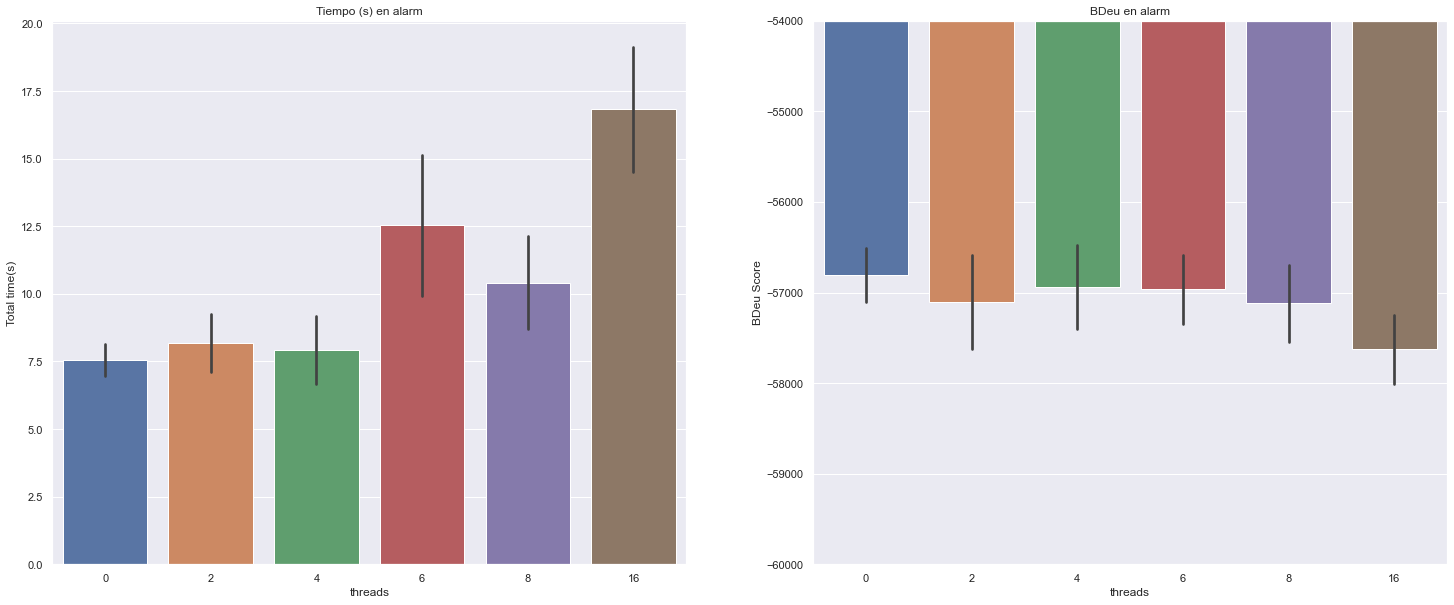

In [68]:
fig, axs = plt.subplots(ncols=2)
sns.barplot(data=df2, x="threads", y='Total time(s)', ax=axs[0], ci='sd')
plt.ylim(-60000,-54000)
sns.barplot(data=df2, x="threads", y='BDeu Score', ax=axs[1], ci='sd')
axs[0].set_title('Tiempo (s) en alarm')
axs[1].set_title('BDeu en alarm')

<AxesSubplot:xlabel='threads', ylabel='Total time(s)'>

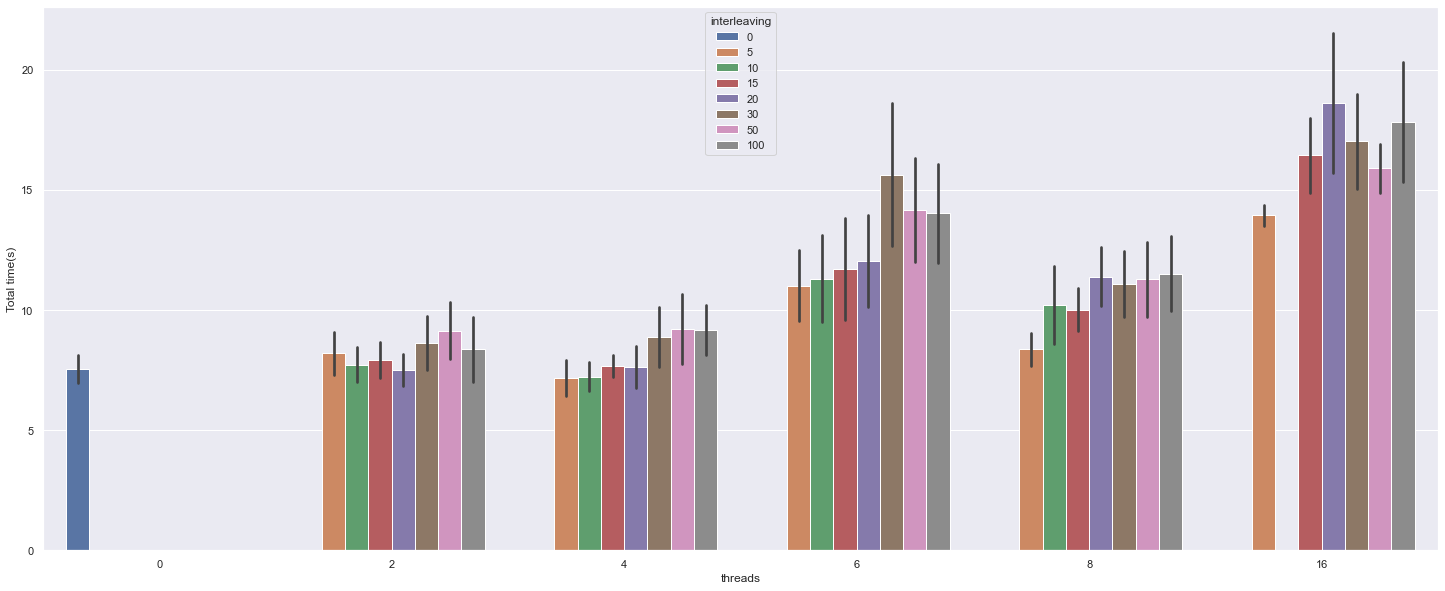

In [69]:
sns.barplot(data=df2, x="threads", y='Total time(s)', hue='interleaving', ci='sd')

<AxesSubplot:xlabel='threads', ylabel='BDeu Score'>

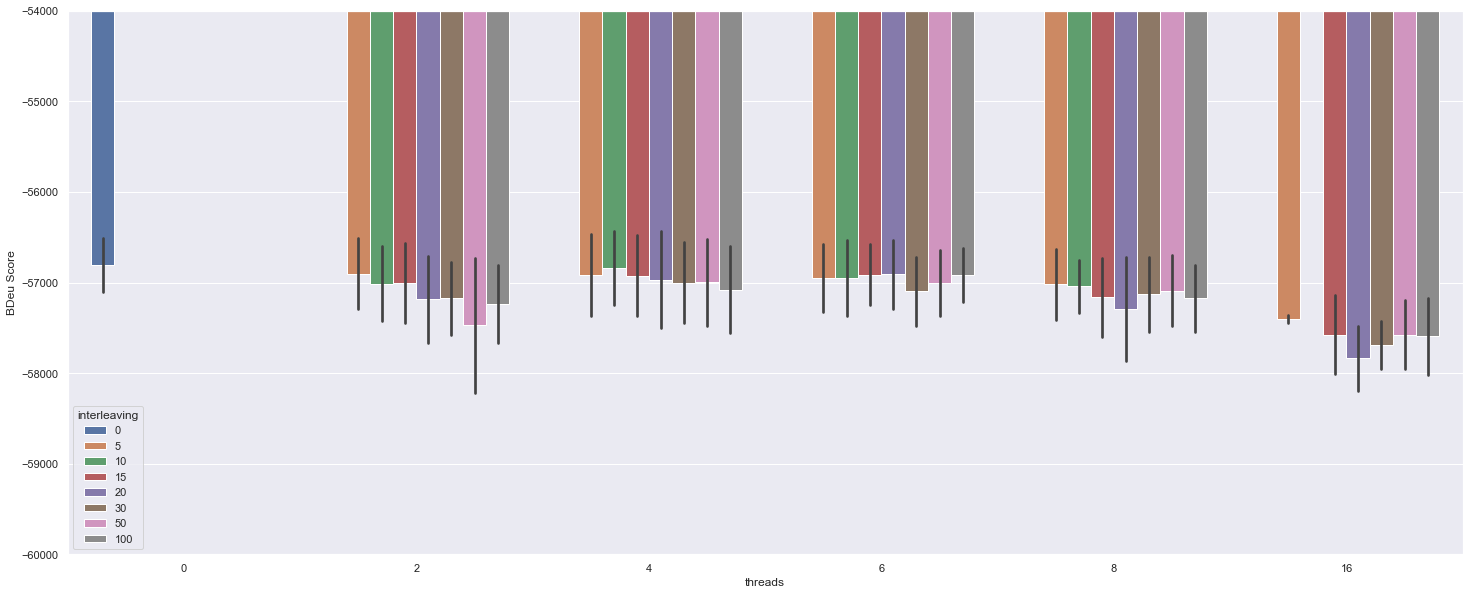

In [70]:
plt.ylim(-60000,-54000)
sns.barplot(data=df2, x="threads", y='BDeu Score', hue='interleaving', ci='sd')

Text(0.5, 1.0, 'Tiempo en alarm por número de hilos (0 = GES)')

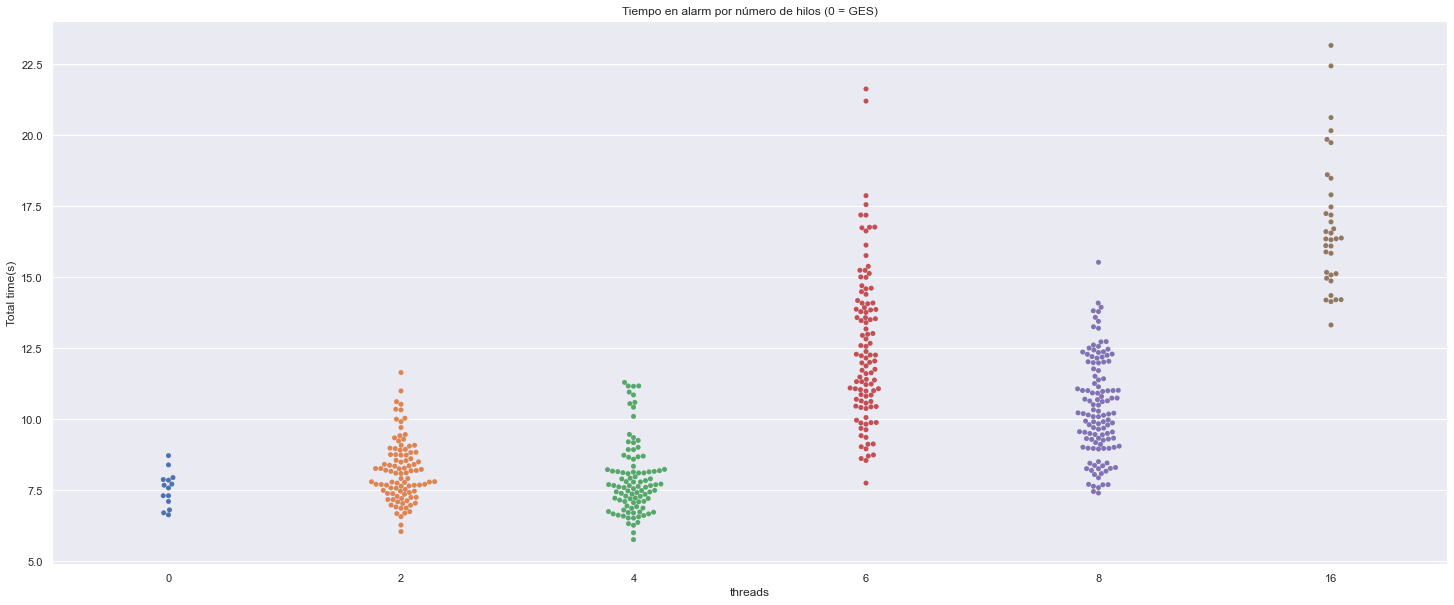

In [71]:
sns.swarmplot(data=df2, x='threads', y='Total time(s)').set_title('Tiempo en alarm por número de hilos (0 = GES)')

Text(0.5, 1.0, 'BDeu en alarm por número de hilos (0 = GES)')

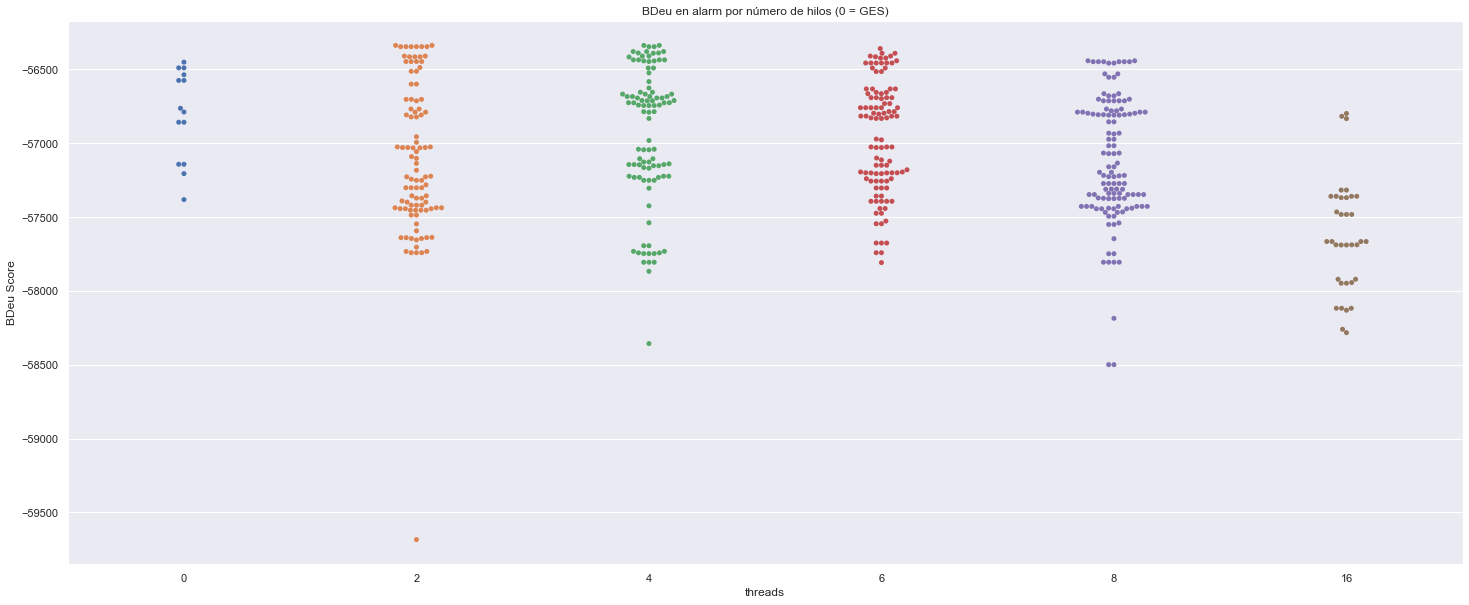

In [72]:
sns.swarmplot(data=df2, x='threads', y='BDeu Score').set_title('BDeu en alarm por número de hilos (0 = GES)')